In [2]:
##############
## Script listens to serial port and writes contents into a file
##############

import serial
import time
serial_port = '/dev/ttyACM0';
baud_rate = 9600; #In arduino, Serial.begin(baud_rate)
write_to_file_path = "output.txt";

output_file = open(write_to_file_path, "w+");



In [3]:
ser = serial.Serial('COM3', 9600)
ticks=time.time()

SerialException: could not open port 'COM3': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [27]:
while time.time()-ticks<60:
    line = ser.readline();
    line = line.decode("utf-8") #ser.readline returns a binary, convert to string
    print(line);
    output_file.write(line);

0

48

104

90

16

-32

-34

-9

5

83

233

216

8

-139

-132

-46

2

-33

-63

-65

-42

-23

25

204

247

83

-96

-149

-87

-11

-21

-55

-71

-46

-24

-3

49

229

247

54

-113

-142

-57

-7

-34

-76

-75

-43

-13

-2

107

235

162

-34

-146

-111

-22

10

-37

-67

-63

-31

-14

25

193

245

95

-92

-144

-86

-13

-13

-49

-77

-60

-27

-3

50

229

247

49

-114

-147

-68

-10

-24

-68

-73

-43

-12

0

46

224

244

51

-119

-140

-67

-1

-24

-66

-79

-51

-18

2

122

237

164

-42

-141

-108

-17

-2

-43

-80

-70

-40

-17

17

196

251

96

-82

-144

-82

-12

-13

-63

-81

-55

-23

-5

69

235

222

17

-125

-123

-48

-2

-33

-71

-72

-47

-20

19

180

248

99

-86

-140

-82

1

-3

-48

-67

-54

-35

0

160

243

131

-67

-144

-93

-4

-6

-52

-78

-58

-40

-5

147

243

152

-41

-131

-105

-21

-10

-45

-77

-63

-31

-2

120

236

154

-29

-114

-105

-35

-17

-39

-70

-56

-32

-10

82

230

170

-17

-119

-112

-33

-6

In [28]:
ser.close()

In [5]:
output_file.close()

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [6]:
df=pd.DataFrame

In [11]:
df['vals']=pd.read_csv('output.txt')

In [13]:
df.drop(axis=1,labels=['0'],inplace=True)

In [14]:
df.head()

,vals
0,48
1,104
2,90
3,16
4,-32


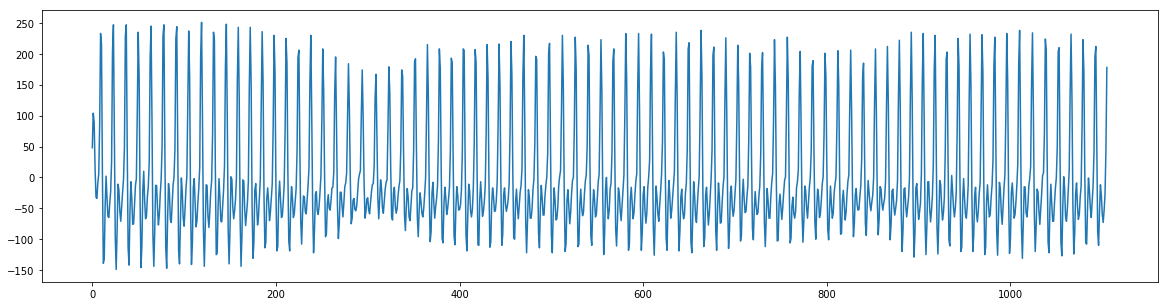

In [15]:
fig=plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.plot(np.arange(0,len(df['vals'])),df['vals'])
plt.show()

In [18]:
pulse=0;
for i,j,k in zip(df['vals'],df['vals'][1:],df['vals'][2:]):
    if j>k and j>i and j>=100:
        pulse=pulse+1
        #print(i,j,k)
print(pulse)

82


In [19]:
if pulse>72:
    print('Unhealthy')
else:
    print('Healthy')

Unhealthy
